## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  64.950191   492.414095  0.586051  10.156106  1.289024
1  69.012081  1522.607713  0.031106   7.835563  0.534720
2  17.726961   275.216089  0.514845   2.815419  1.359336
3  12.126050   662.823075  0.602722   2.433658  1.572514
4  42.894588  1338.790134  0.349511  10.204159  1.246230


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9715767	total: 57.2ms	remaining: 57.1s
1:	learn: 0.9619809	total: 58ms	remaining: 28.9s
2:	learn: 0.9542444	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9436410	total: 59ms	remaining: 14.7s
4:	learn: 0.9338735	total: 59.5ms	remaining: 11.8s
5:	learn: 0.9242244	total: 59.9ms	remaining: 9.93s
6:	learn: 0.9148196	total: 60.4ms	remaining: 8.57s
7:	learn: 0.9055469	total: 60.8ms	remaining: 7.54s
8:	learn: 0.8979738	total: 61.4ms	remaining: 6.76s
9:	learn: 0.8893303	total: 61.9ms	remaining: 6.13s
10:	learn: 0.8816470	total: 62.4ms	remaining: 5.61s
11:	learn: 0.8729637	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8655407	total: 63.2ms	remaining: 4.8s
13:	learn: 0.8575310	total: 63.7ms	remaining: 4.49s
14:	learn: 0.8489911	total: 64.2ms	remaining: 4.22s
15:	learn: 0.8413583	total: 64.8ms	remaining: 3.98s
16:	learn: 0.8337604	total: 65.3ms	remaining: 3.77s
17:	learn: 0.8269678	total: 65.8ms	remaining: 3.59s
18:	learn: 0.8189498	total: 66.2ms	remaining: 3.4

112:	learn: 0.4017791	total: 107ms	remaining: 839ms
113:	learn: 0.3999817	total: 107ms	remaining: 835ms
114:	learn: 0.3979636	total: 108ms	remaining: 830ms
115:	learn: 0.3951656	total: 108ms	remaining: 825ms
116:	learn: 0.3926398	total: 109ms	remaining: 821ms
117:	learn: 0.3904156	total: 109ms	remaining: 816ms
118:	learn: 0.3877590	total: 110ms	remaining: 811ms
119:	learn: 0.3854507	total: 110ms	remaining: 806ms
120:	learn: 0.3826740	total: 111ms	remaining: 807ms
121:	learn: 0.3808270	total: 111ms	remaining: 802ms
122:	learn: 0.3783939	total: 112ms	remaining: 796ms
123:	learn: 0.3766748	total: 112ms	remaining: 793ms
124:	learn: 0.3742236	total: 113ms	remaining: 788ms
125:	learn: 0.3722233	total: 113ms	remaining: 785ms
126:	learn: 0.3698137	total: 114ms	remaining: 781ms
127:	learn: 0.3674637	total: 114ms	remaining: 777ms
128:	learn: 0.3645929	total: 114ms	remaining: 773ms
129:	learn: 0.3626046	total: 115ms	remaining: 769ms
130:	learn: 0.3600003	total: 115ms	remaining: 765ms
131:	learn: 

292:	learn: 0.1861528	total: 186ms	remaining: 448ms
293:	learn: 0.1857951	total: 187ms	remaining: 449ms
294:	learn: 0.1851016	total: 187ms	remaining: 447ms
295:	learn: 0.1845385	total: 187ms	remaining: 446ms
296:	learn: 0.1838368	total: 188ms	remaining: 445ms
297:	learn: 0.1832384	total: 188ms	remaining: 443ms
298:	learn: 0.1828982	total: 189ms	remaining: 442ms
299:	learn: 0.1822260	total: 189ms	remaining: 441ms
300:	learn: 0.1815738	total: 189ms	remaining: 440ms
301:	learn: 0.1809282	total: 190ms	remaining: 439ms
302:	learn: 0.1806522	total: 190ms	remaining: 438ms
303:	learn: 0.1802577	total: 191ms	remaining: 437ms
304:	learn: 0.1799522	total: 191ms	remaining: 436ms
305:	learn: 0.1791909	total: 192ms	remaining: 435ms
306:	learn: 0.1786477	total: 192ms	remaining: 434ms
307:	learn: 0.1781099	total: 193ms	remaining: 433ms
308:	learn: 0.1774356	total: 193ms	remaining: 432ms
309:	learn: 0.1768244	total: 194ms	remaining: 431ms
310:	learn: 0.1761854	total: 194ms	remaining: 430ms
311:	learn: 

524:	learn: 0.0944703	total: 288ms	remaining: 261ms
525:	learn: 0.0943465	total: 289ms	remaining: 260ms
526:	learn: 0.0942141	total: 289ms	remaining: 260ms
527:	learn: 0.0939081	total: 290ms	remaining: 259ms
528:	learn: 0.0937770	total: 290ms	remaining: 258ms
529:	learn: 0.0935579	total: 291ms	remaining: 258ms
530:	learn: 0.0932303	total: 291ms	remaining: 257ms
531:	learn: 0.0931092	total: 291ms	remaining: 256ms
532:	learn: 0.0929809	total: 292ms	remaining: 256ms
533:	learn: 0.0926326	total: 292ms	remaining: 255ms
534:	learn: 0.0925058	total: 292ms	remaining: 254ms
535:	learn: 0.0921687	total: 293ms	remaining: 254ms
536:	learn: 0.0919562	total: 293ms	remaining: 253ms
537:	learn: 0.0917756	total: 294ms	remaining: 252ms
538:	learn: 0.0916794	total: 294ms	remaining: 252ms
539:	learn: 0.0915547	total: 295ms	remaining: 251ms
540:	learn: 0.0914917	total: 295ms	remaining: 250ms
541:	learn: 0.0912825	total: 296ms	remaining: 250ms
542:	learn: 0.0909529	total: 296ms	remaining: 249ms
543:	learn: 

704:	learn: 0.0599651	total: 367ms	remaining: 153ms
705:	learn: 0.0597367	total: 367ms	remaining: 153ms
706:	learn: 0.0595919	total: 367ms	remaining: 152ms
707:	learn: 0.0594963	total: 368ms	remaining: 152ms
708:	learn: 0.0594023	total: 368ms	remaining: 151ms
709:	learn: 0.0592905	total: 368ms	remaining: 151ms
710:	learn: 0.0592270	total: 369ms	remaining: 150ms
711:	learn: 0.0591170	total: 369ms	remaining: 149ms
712:	learn: 0.0590252	total: 370ms	remaining: 149ms
713:	learn: 0.0588822	total: 370ms	remaining: 148ms
714:	learn: 0.0587919	total: 371ms	remaining: 148ms
715:	learn: 0.0586217	total: 371ms	remaining: 147ms
716:	learn: 0.0585331	total: 372ms	remaining: 147ms
717:	learn: 0.0584254	total: 372ms	remaining: 146ms
718:	learn: 0.0582065	total: 373ms	remaining: 146ms
719:	learn: 0.0580666	total: 373ms	remaining: 145ms
720:	learn: 0.0579613	total: 373ms	remaining: 145ms
721:	learn: 0.0578391	total: 374ms	remaining: 144ms
722:	learn: 0.0577352	total: 374ms	remaining: 143ms
723:	learn: 

936:	learn: 0.0393991	total: 470ms	remaining: 31.6ms
937:	learn: 0.0393833	total: 471ms	remaining: 31.1ms
938:	learn: 0.0393432	total: 471ms	remaining: 30.6ms
939:	learn: 0.0393018	total: 471ms	remaining: 30.1ms
940:	learn: 0.0392862	total: 472ms	remaining: 29.6ms
941:	learn: 0.0392467	total: 472ms	remaining: 29.1ms
942:	learn: 0.0390840	total: 473ms	remaining: 28.6ms
943:	learn: 0.0390017	total: 473ms	remaining: 28.1ms
944:	learn: 0.0389469	total: 473ms	remaining: 27.5ms
945:	learn: 0.0388952	total: 474ms	remaining: 27ms
946:	learn: 0.0388463	total: 474ms	remaining: 26.5ms
947:	learn: 0.0387669	total: 475ms	remaining: 26ms
948:	learn: 0.0386420	total: 475ms	remaining: 25.5ms
949:	learn: 0.0385911	total: 475ms	remaining: 25ms
950:	learn: 0.0385428	total: 476ms	remaining: 24.5ms
951:	learn: 0.0384319	total: 476ms	remaining: 24ms
952:	learn: 0.0383936	total: 477ms	remaining: 23.5ms
953:	learn: 0.0383334	total: 477ms	remaining: 23ms
954:	learn: 0.0382235	total: 477ms	remaining: 22.5ms
955

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

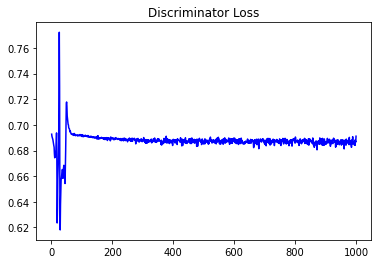

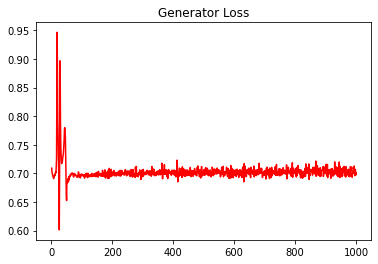

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.37962449594921627


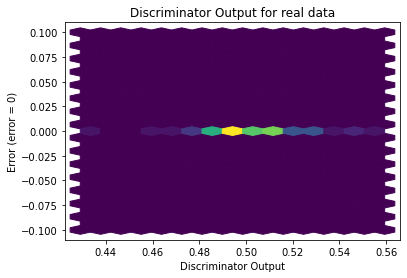

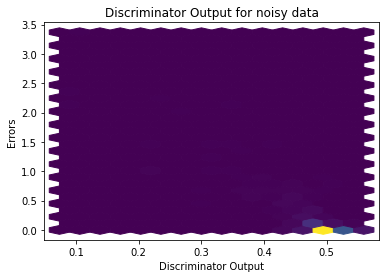

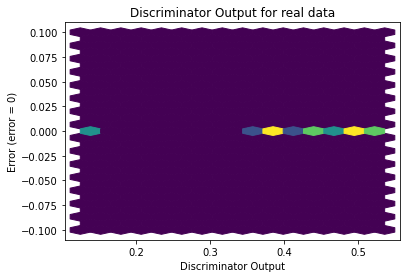

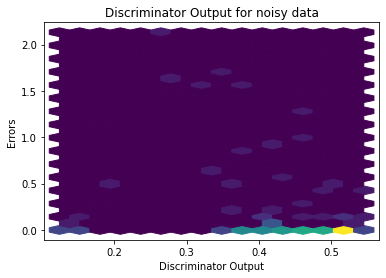

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


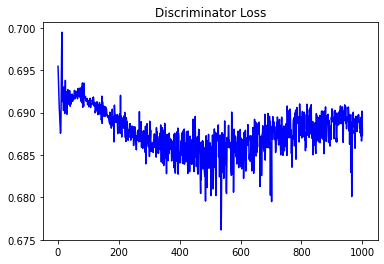

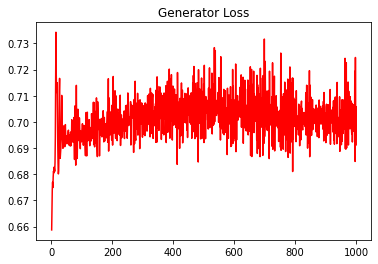

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.39768778801351695


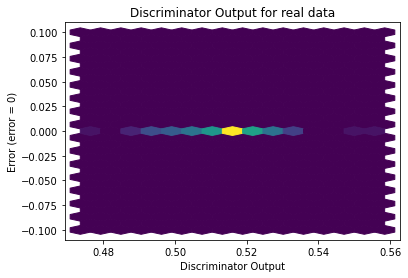

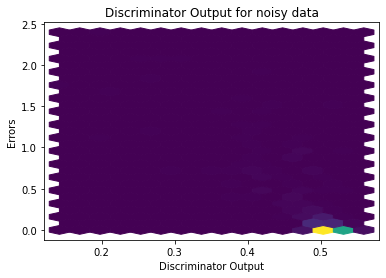

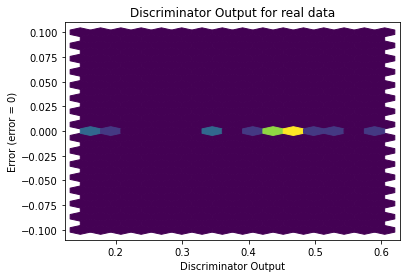

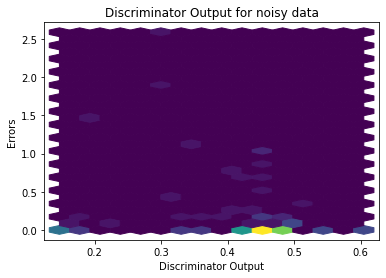

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9279]], requires_grad=True)
